In [2]:
# Univariate Time Series Analysis
# load and plot dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.multioutput import RegressorChain
from sklearn.cluster import KMeans
import numpy as np
np.random.seed(123)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
import seaborn as sns
sns.set_style('dark')
from datetime import datetime, timedelta
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (15, 6)
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import matplotlib.pyplot as plt
import pandas as pd
import math

import tensorflow as tf
tf.random.set_seed(1)
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, MaxPooling1D  # Import directly from keras.layers
from keras.layers import LSTM, RepeatVector, TimeDistributed, Flatten
from keras.layers import SimpleRNN, GRU, LSTM
from keras.layers import SimpleRNN, GRU, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from IPython.display import set_matplotlib_formats
import itertools
import warnings


warnings.filterwarnings('ignore')

from pandas import read_csv
from matplotlib import pyplot

In [3]:
train=pd.read_csv('DailyDelhiClimateTrain.csv')
test=pd.read_csv('DailyDelhiClimateTest.csv')

In [4]:
train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [5]:
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [6]:
train.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.0,25.495521,7.348103,6.000000,18.857143,27.714286,31.305804,38.714286
humidity,1462.0,60.771702,16.769652,13.428571,50.375000,62.625000,72.218750,100.000000
wind_speed,1462.0,6.802209,4.561602,0.000000,3.475000,6.221667,9.238235,42.220000
meanpressure,1462.0,1011.104548,180.231668,-3.041667,1001.580357,1008.563492,1014.944901,7679.333333


In [10]:
test.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [13]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,114.0,21.713079,6.360072,11.0000,16.437198,19.875000,27.705357,34.500000
humidity,114.0,56.258362,19.068083,17.7500,39.625000,57.750000,71.902778,95.833333
wind_speed,114.0,8.143924,3.588049,1.3875,5.563542,8.069444,10.068750,19.314286
meanpressure,114.0,1004.035090,89.474692,59.0000,1007.437500,1012.739316,1016.739583,1022.809524


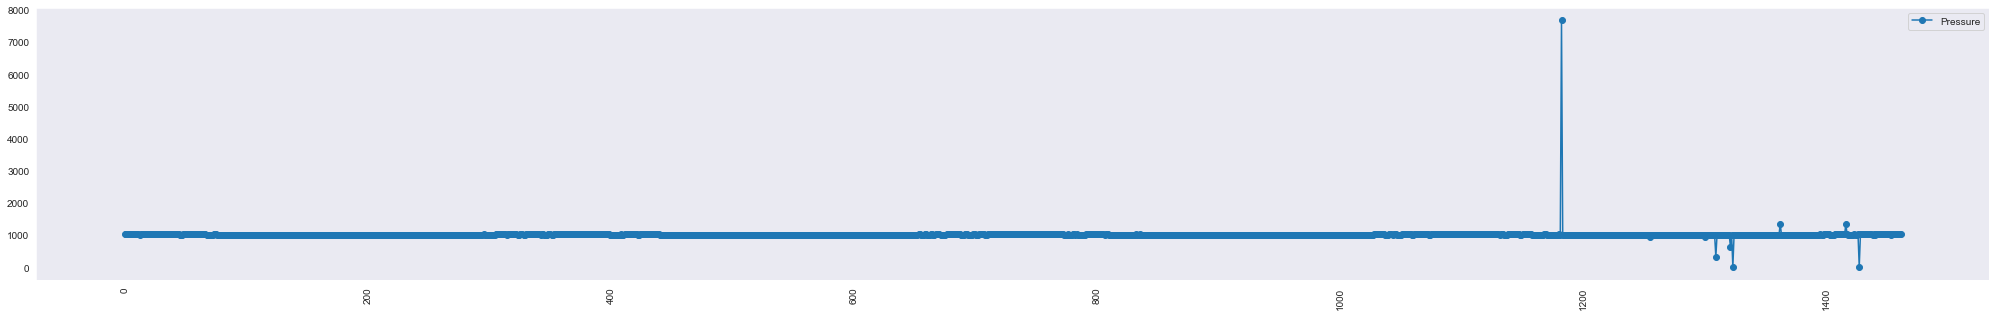

In [14]:
# Ploting the curve 
plt.figure(figsize=(35,5))
#plt.grid()
plt.plot(train['meanpressure'], marker='o', label='Pressure')
plt.xticks(rotation=90)
plt.legend()
plt.show()

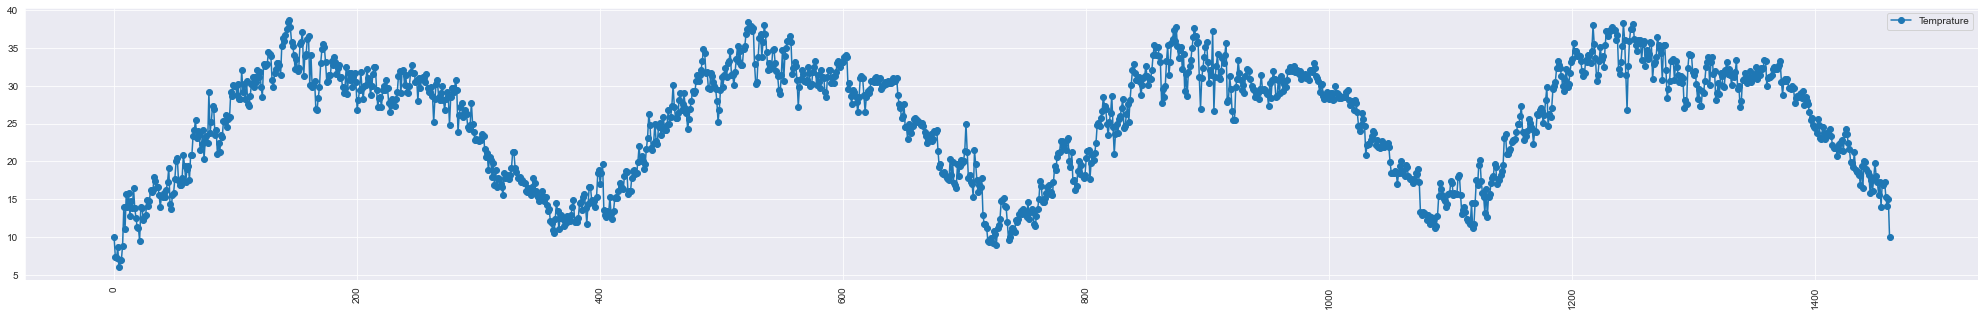

In [15]:
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(train['meantemp'], marker='o', label='Temprature')
plt.xticks(rotation=90)
plt.legend()
plt.show()

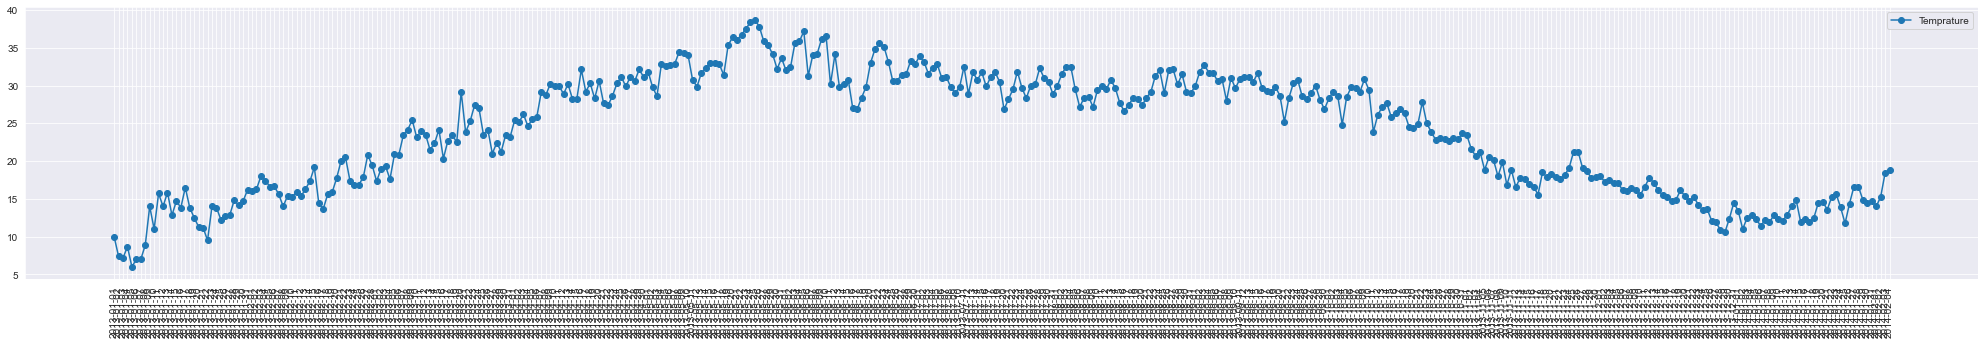

In [16]:
# Plot first 400 observation 
# Ploting the curve 
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(train['date'][:400],train['meantemp'][:400], marker='o', label='Temprature')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [17]:
#Seasonal Decomposition
ts_decomposition = seasonal_decompose(x=train['meantemp'], model='additive', period=6)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

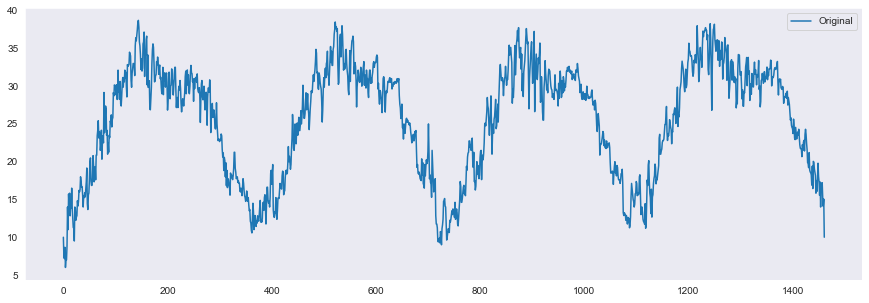

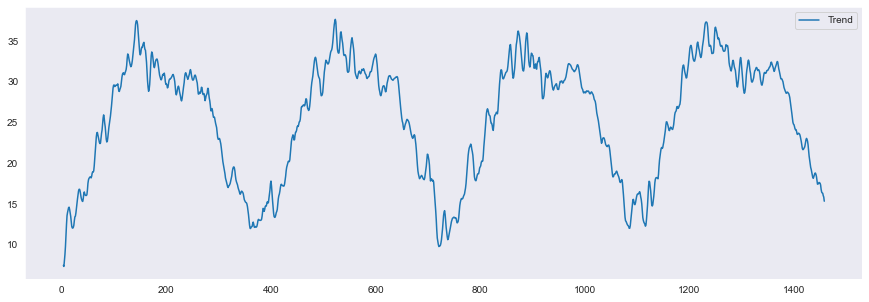

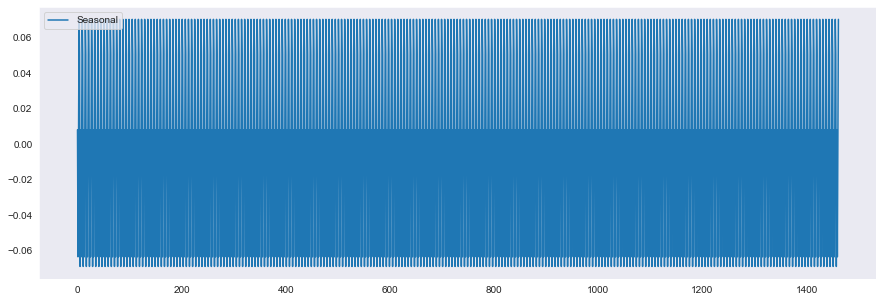

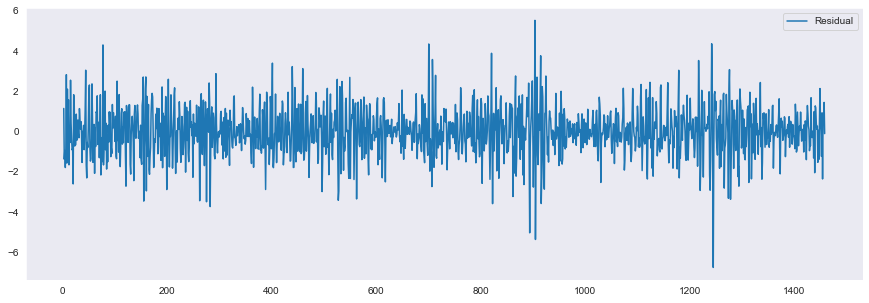

In [20]:
plt.figure(figsize=(15,5))
plt.plot(train['meantemp'], label='Original')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

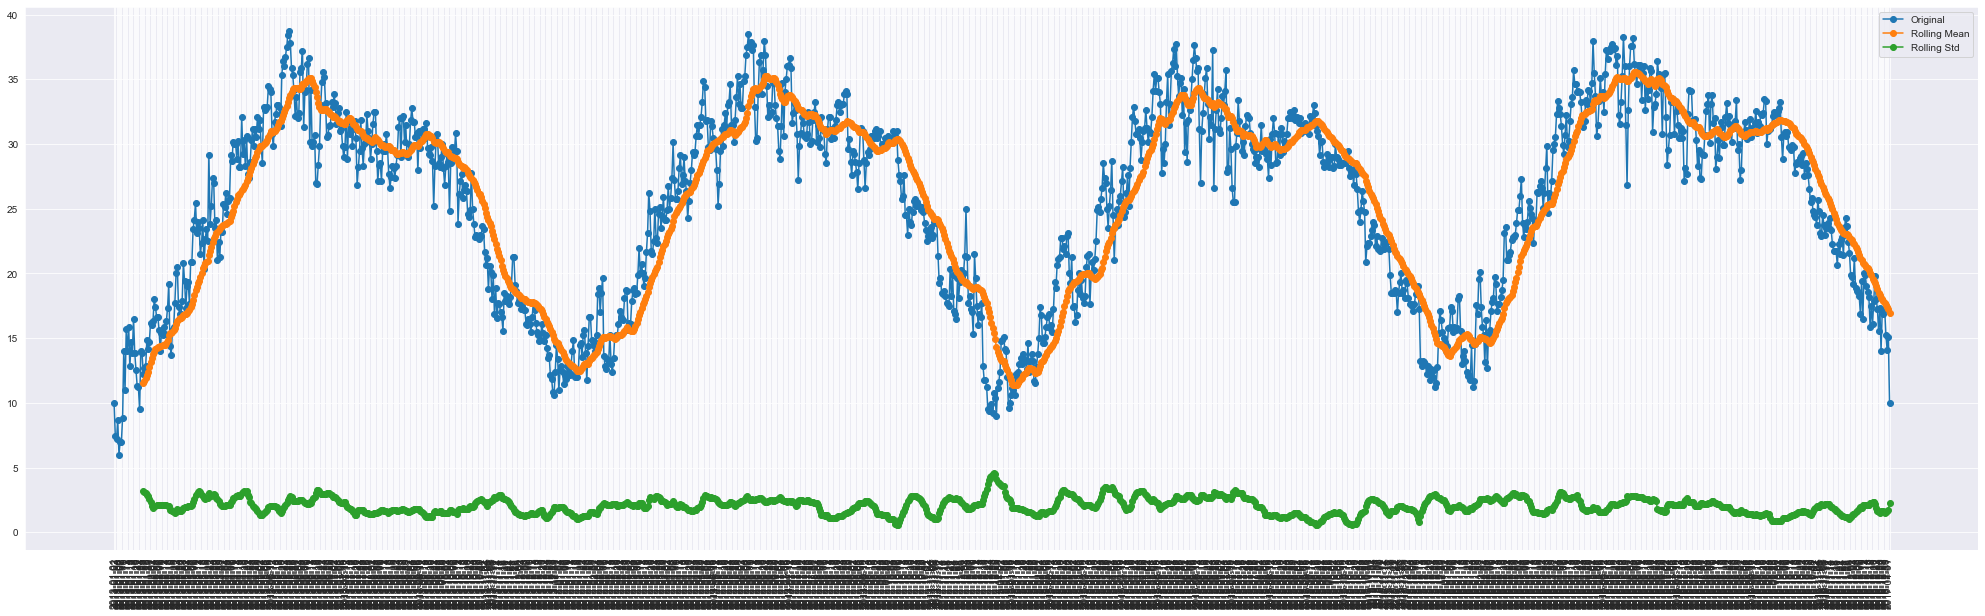

In [21]:
#Rolling Mean and Standard Deviation
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(train['date'], train['meantemp'], marker='o', label='Original')
plt.plot(train['date'], train['meantemp'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(train['date'], train['meantemp'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.legend()
plt.show()

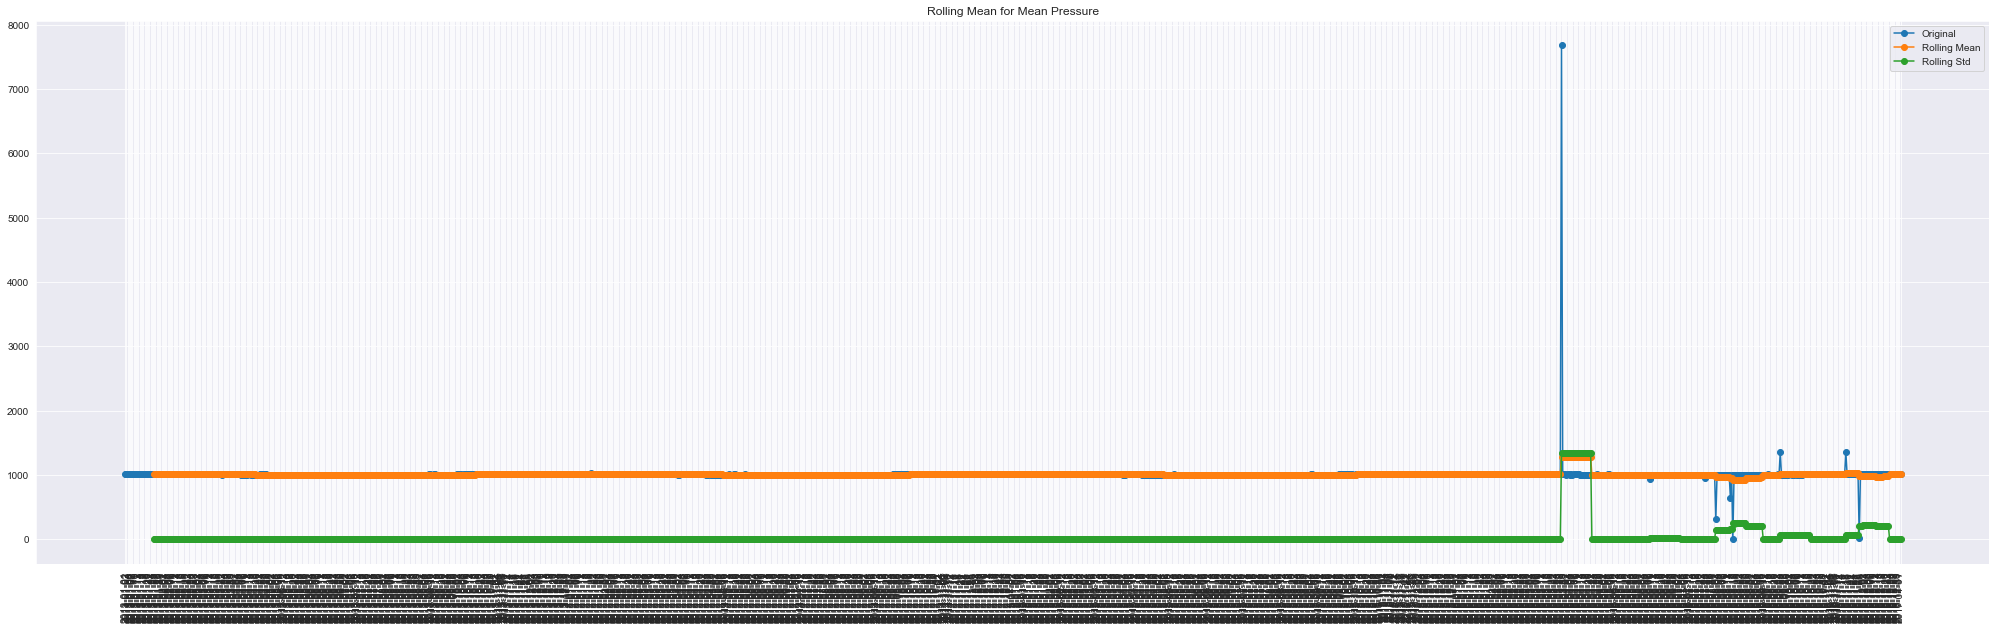

In [22]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(train['date'], train['meanpressure'], marker='o', label='Original')
plt.plot(train['date'], train['meanpressure'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(train['date'], train['meanpressure'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Pressure")
plt.legend()
plt.show()

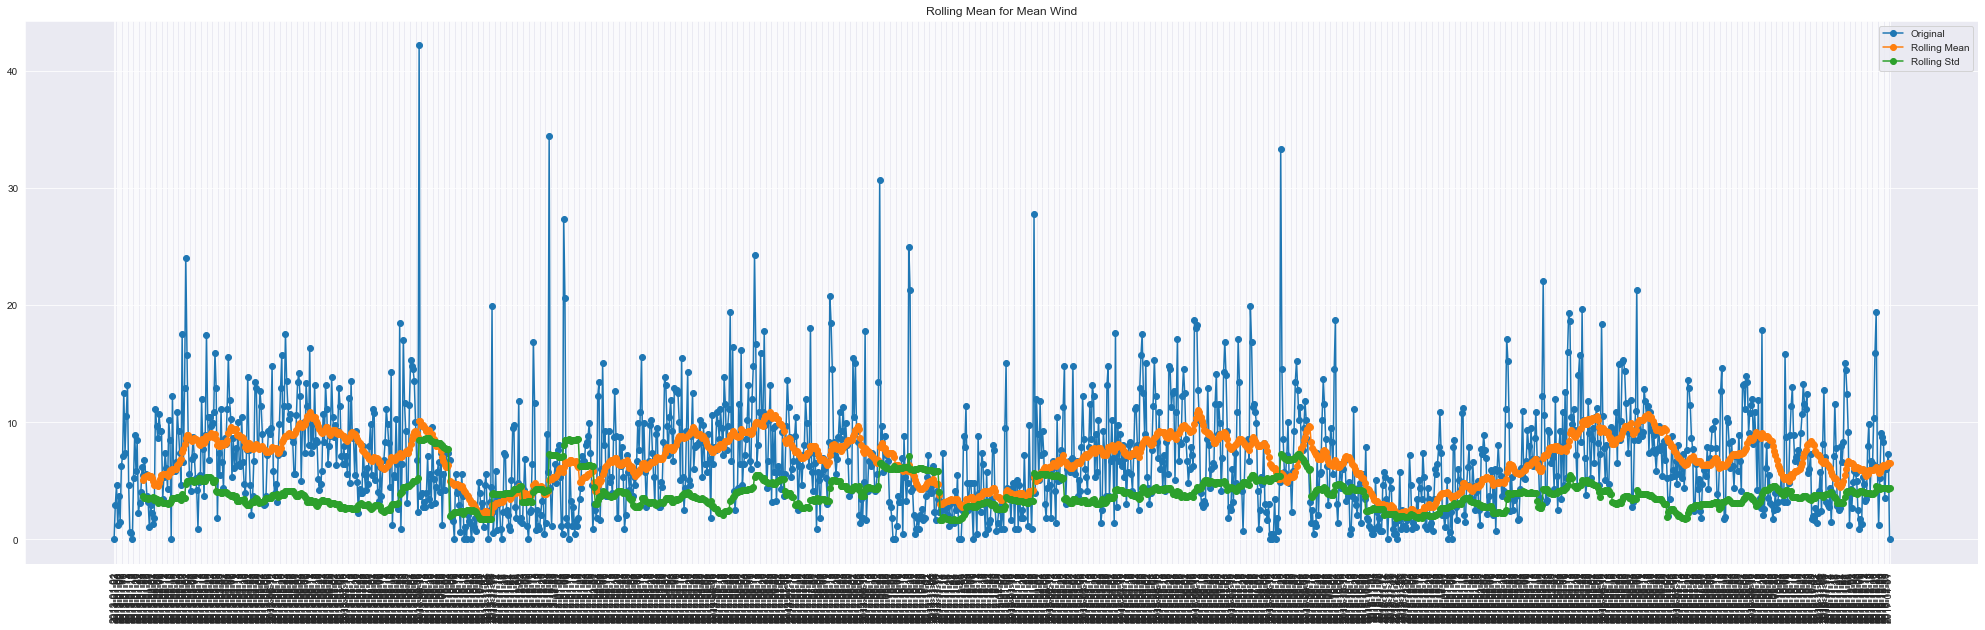

In [23]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(train['date'], train['wind_speed'], marker='o', label='Original')
plt.plot(train['date'], train['wind_speed'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(train['date'], train['wind_speed'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Wind")
plt.legend()
plt.show()

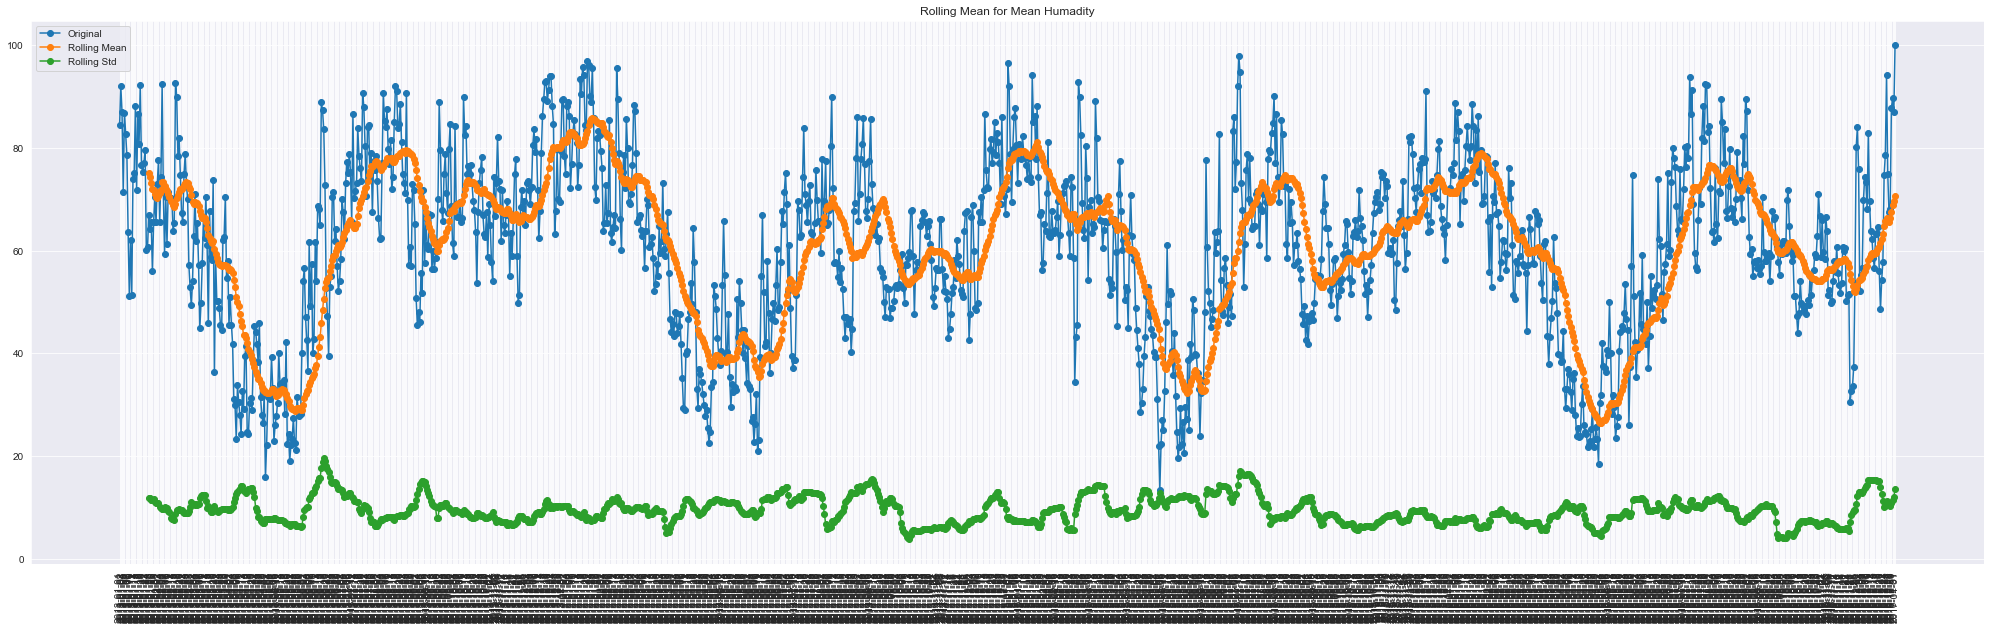

In [24]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(train['date'], train['humidity'], marker='o', label='Original')
plt.plot(train['date'], train['humidity'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(train['date'], train['humidity'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Humadity")
plt.legend()
plt.show()

In [25]:
# Stationary Check
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [27]:
# ADF Test on each column
for name, column in train.drop(columns='date').items():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "meantemp" 
    -----------------------------------------------
ADF Statistic: -2.021069
p-value: 0.277412
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Non-stationary


    Augmented Dickey-Fuller Test on "humidity" 
    -----------------------------------------------
ADF Statistic: -3.675577
p-value: 0.004470
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "wind_speed" 
    -----------------------------------------------
ADF Statistic: -3.838097
p-value: 0.002541
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "meanpressure" 
    -----------------------------------------------
ADF Statistic: -38.078590
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary




In [28]:
# ADF Test on each column
for name, column in train.drop(columns='date').diff().dropna().items():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "meantemp" 
    -----------------------------------------------
ADF Statistic: -16.378720
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "humidity" 
    -----------------------------------------------
ADF Statistic: -12.683532
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "wind_speed" 
    -----------------------------------------------
ADF Statistic: -12.837720
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


    Augmented Dickey-Fuller Test on "meanpressure" 
    -----------------------------------------------
ADF Statistic: -12.945640
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary




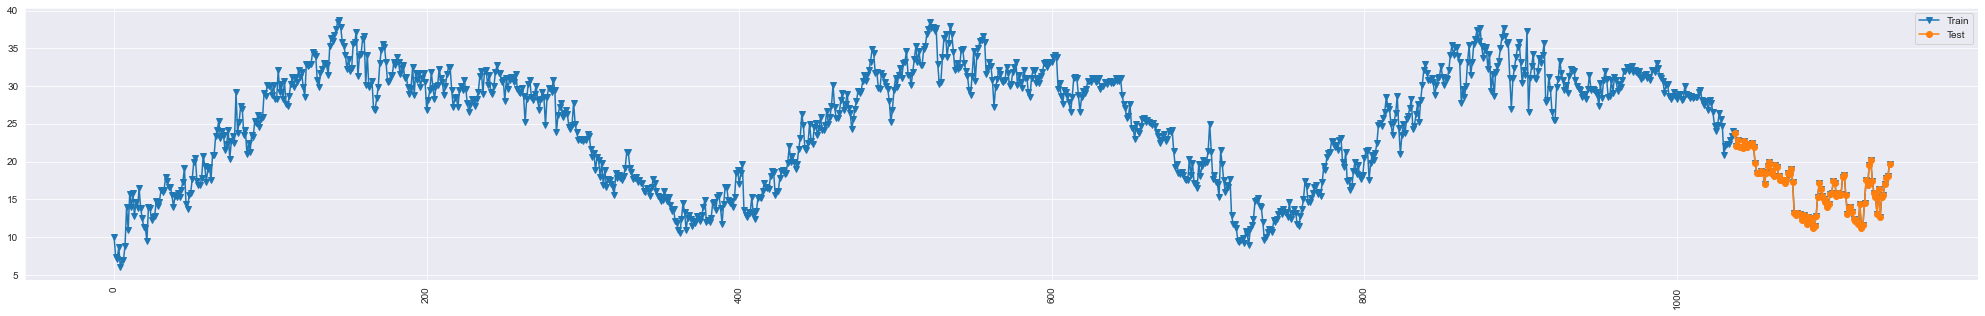

In [32]:
#Train-Test-Split

train=train[:-100]
test=train[-100:]

plt.figure(figsize=(35,5))
plt.grid()
plt.plot(train['meantemp'], marker='v', label='Train')
plt.plot( test['meantemp'], marker='o', label='Test')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=3610.563, Time=5.14 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=4512.846, Time=0.17 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=4258.829, Time=0.36 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=inf, Time=1.19 sec
 ARIMA(2,2,2)(0,0,1)[4]             : AIC=3608.661, Time=2.47 sec
 ARIMA(2,2,2)(0,0,0)[4]             : AIC=3609.138, Time=1.31 sec
 ARIMA(2,2,2)(0,0,2)[4]             : AIC=3610.547, Time=4.78 sec
 ARIMA(2,2,2)(1,0,0)[4]             : AIC=3608.725, Time=1.99 sec
 ARIMA(2,2,2)(1,0,2)[4]             : AIC=3612.637, Time=4.71 sec
 ARIMA(1,2,2)(0,0,1)[4]             : AIC=inf, Time=1.42 sec
 ARIMA(2,2,1)(0,0,1)[4]             : AIC=inf, Time=1.61 sec
 ARIMA(3,2,2)(0,0,1)[4]             : AIC=inf, Time=2.69 sec
 ARIMA(2,2,3)(0,0,1)[4]             : AIC=3610.503, Time=5.78 sec
 ARIMA(1,2,1)(0,0,1)[4]             : AIC=inf, Time=1.26 sec
 ARIMA(1,2,3)(0,0,1)[4]             : AIC=inf, Time=2.86 s

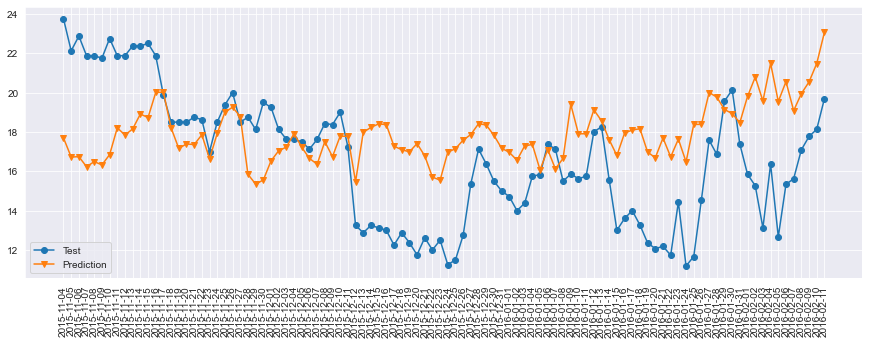

Mean Absolute Percentage Error 0.20104842508138063
Mean Squared Error 12.990395084602419
RMSE 3.6042190672325147
AIC values 3608.6607842873027


,Test,Prediction,Difference,% Chnage
0,23.750000,17.695769,6.054231,25.491500
1,22.125000,16.725237,5.399763,24.405707
2,22.875000,16.743265,6.131735,26.805400
3,21.875000,16.233482,5.641518,25.789799
4,21.875000,16.490750,5.384250,24.613715
...,...,...,...,...
95,15.625000,19.083128,-3.458128,22.132021
96,17.090909,19.947231,-2.856322,16.712523
97,17.769231,20.543771,-2.774540,15.614297
98,18.133333,21.479009,-3.345676,18.450418


In [33]:
# Model Evaluation 

# Fit a simple auto_arima model
arima = pm.auto_arima(train['meantemp'],X=train.drop(columns=['date','meantemp']), d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)



pred=arima.predict(n_periods=100, X=test.drop(columns=['date','meantemp']), alpha=0.05)
pred

plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(train['date'][-100:],test['meantemp'], marker='o', label='Test')
plt.plot(train['date'][-100:],pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_percentage_error(test['meantemp'], pred)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['meantemp'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)


a=pd.DataFrame(test['meantemp'])
a=a.reset_index()
a=a.drop(columns='index')
a

prediction=pd.DataFrame(pred)
prediction=prediction.reset_index()
prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['Test']=a['meantemp']
output['Prediction']=prediction[0]
output['Difference']=output['Test']-output['Prediction']
output['% Chnage']=abs(output['Difference']/output['Test'])*100
output

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=3619.151, Time=3.75 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=3692.654, Time=0.19 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=3693.240, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=3691.763, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=3690.669, Time=0.17 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=3617.543, Time=1.49 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=3617.823, Time=1.05 sec
 ARIMA(2,1,2)(0,0,2)[4] intercept   : AIC=3619.037, Time=2.10 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=3617.690, Time=1.46 sec
 ARIMA(2,1,2)(1,0,2)[4] intercept   : AIC=3621.034, Time=5.05 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=3619.005, Time=1.04 sec
 ARIMA(2,1,1)(0,0,1)[4] intercept   : AIC=3616.833, Time=1.13 sec
 ARIMA(2,1,1)(0,0,0)[4] intercept   : AIC=3616.172, Time=0.49 sec
 ARIMA(2,1,1)(1,0,0)[4] intercept   : AIC=3616.891, Time=1.00 sec
 ARIMA(2,1,1)(1,0,1)[4] intercept

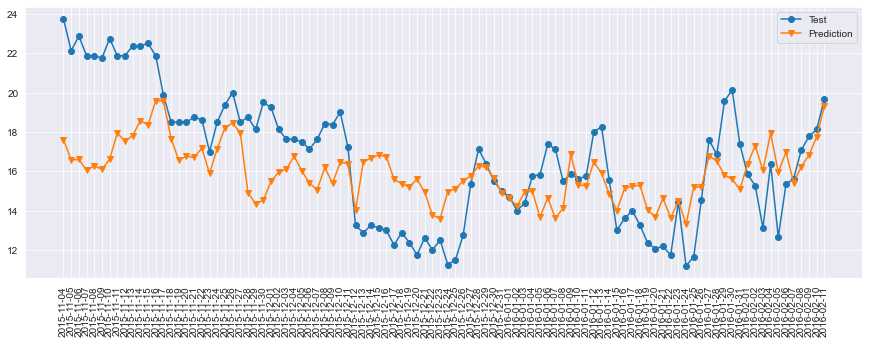

Mean Absolute Percentage Error 0.13404771614470992
Mean Squared Error 7.52528898704843
RMSE 2.7432260182216903
AIC values 3614.2681550495313


,Test,Prediction,Difference,% Chnage
0,23.750000,17.606575,6.143425,25.867051
1,22.125000,16.579532,5.545468,25.064260
2,22.875000,16.600530,6.274470,27.429378
3,21.875000,16.048912,5.826088,26.633544
4,21.875000,16.276276,5.598724,25.594169
...,...,...,...,...
95,15.625000,15.423465,0.201535,1.289824
96,17.090909,16.237865,0.853044,4.991215
97,17.769231,16.827063,0.942168,5.302244
98,18.133333,17.753374,0.379959,2.095361


In [34]:
# Model Evaluation 

# Fit a simple auto_arima model
arima = pm.auto_arima(train['meantemp'],X=train.drop(columns=['date','meantemp']), d=1,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)



pred=arima.predict(n_periods=100, X=test.drop(columns=['date','meantemp']), alpha=0.05)
pred

plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(train['date'][-100:],test['meantemp'], marker='o', label='Test')
plt.plot(train['date'][-100:],pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_percentage_error(test['meantemp'], pred)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['meantemp'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)


a=pd.DataFrame(test['meantemp'])
a=a.reset_index()
a=a.drop(columns='index')
a

prediction=pd.DataFrame(pred)
prediction=prediction.reset_index()
prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['Test']=a['meantemp']
output['Prediction']=prediction[0]
output['Difference']=output['Test']-output['Prediction']
output['% Chnage']=abs(output['Difference']/output['Test'])*100
output